## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [88]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [89]:
path = r'/Users/arturassada/Desktop/Brazilian E-Commerce'

In [90]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'data_general.csv'))

In [91]:
df.shape

(115723, 35)

In [92]:
df.head()

,Unnamed: 0,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,...,9.0,14.0,27277,volta redonda,SP,cool_stuff,1.0,credit_card,2.0,72.19
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,30.0,40.0,3471,sao paulo,SP,pet_shop,1.0,credit_card,3.0,259.83
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,13.0,33.0,37564,borda da mata,MG,furniture_decor,1.0,credit_card,5.0,216.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,10.0,15.0,14403,franca,SP,perfumery,1.0,credit_card,2.0,25.78
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,40.0,30.0,87900,loanda,PR,garden_tools,1.0,credit_card,3.0,218.04


In [93]:
df3 = df.groupby('order_id').agg({'order_item_id': 'count', 'price': 'sum', 'freight_value': 'sum'}).rename(columns={'order_id': 'order_id', 'price': 'order_value', 'order_item_id' : 'product_count'})


In [94]:
df3.head(5)

,product_count,order_value,freight_value
order_id,,,
00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14


### 2. The elbow technique

In [95]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [96]:
score = [kmeans[i].fit(df3).score(df3) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-5522532829.25405,
 -2740497497.9625254,
 -1709606316.9513273,
 -1135808799.6106098,
 -765666375.0906754,
 -558836735.8544035,
 -427197105.59477556,
 -341945340.4752728,
 -290959203.56532806]

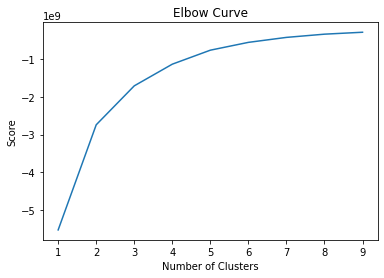

In [97]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for clusters is three. 

### 3. k-means clustering

In [98]:
# Create the k-means object.

kmeans = KMeans(n_clusters=3) 


In [99]:
# Fit the k-means object to the data.

kmeans.fit(df3)

KMeans(n_clusters=3)

In [100]:
df3['clusters'] = kmeans.fit_predict(df3)

In [101]:
df3.head()

,product_count,order_value,freight_value,clusters
order_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,0
00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,0
000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,0
00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,0
00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,0


In [102]:
df3['clusters'].value_counts()

0    90375
2     5663
1      440
Name: clusters, dtype: int64

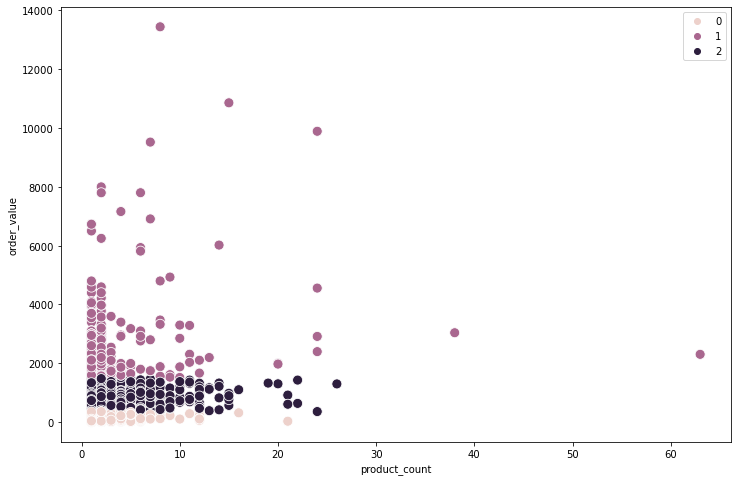

In [103]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df3['product_count'], y=df3['order_value'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('product_count') # Label x-axis.
plt.ylabel('order_value') # Label y-axis.
plt.show()

#### Clear to see dependency of order value to order count. Clear 3 clusters with a few outliers on Y and X axes can be removed. 

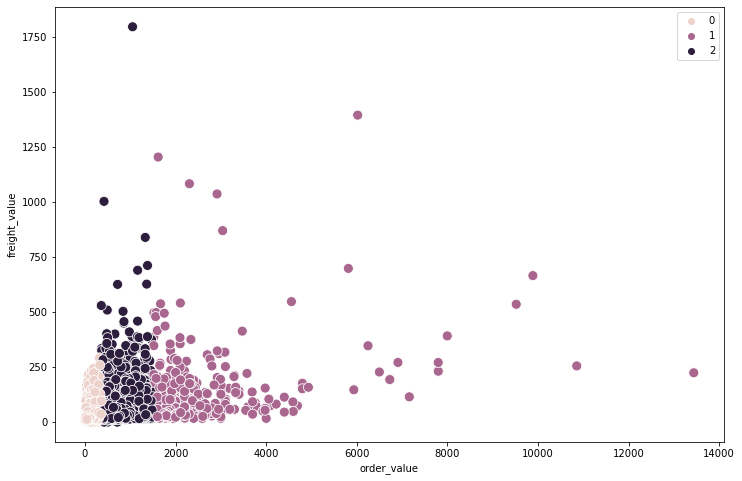

In [104]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df3['order_value'], y=df3['freight_value'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('order_value') 
plt.ylabel('freight_value') 
plt.show()

#### Clear 3 clusters. Seems that increasing order_value has impact on freight_value but not at the same 1:1 ratio. furthermore, would remove outliers and see the clusters in clearer fashion. 

In [105]:
df3.loc[df3['clusters'] == 2, 'cluster'] = 'dark purple'
df3.loc[df3['clusters'] == 1, 'cluster'] = 'purple'
df3.loc[df3['clusters'] == 0, 'cluster'] = 'pink'

In [106]:
df3.groupby('cluster').agg({'product_count':['mean', 'median'], 
                         'order_value':['mean', 'median'], 
                         'freight_value':['mean', 'median']})

product_count         order_value          freight_value        
                     mean median         mean   median          mean  median
cluster                                                                     
dark purple      1.677026    1.0   642.049357   564.00     55.194300  36.410
pink             1.163176    1.0   101.635341    79.99     21.550535  16.950
purple           2.509091    1.0  2398.300659  1999.00    118.437659  68.785

In [107]:
df3.head(5)

,product_count,order_value,freight_value,clusters,cluster
order_id,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,0,pink
00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,0,pink
000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,0,pink
00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,0,pink
00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,0,pink
